In [1]:
import ROOT as rt
from rep import plotting

In [2]:
from array import array
import math

rt.gStyle.SetOptStat("emr")
rt.gStyle.SetOptFit(1111)

r = rt.TRandom3()                        # Random generator

SavePlots = False

verbose = False
Nverbose = 10



#----------------------------------------------------------------------------------
# Histogram with fit (1D):
#----------------------------------------------------------------------------------

# Statistics and fitting results replaced in:
rt.gStyle.SetStatX(0.92);    # Top right corner.
rt.gStyle.SetStatY(0.92);

# Define histograms (name, title, number of bins, minimum, maximum):
if not 'Hist_x' in locals():
    Hist_x = rt.TH1F("Hist_x", "Hist_x", 100, -5.0, 5.0)

if not 'Hist_y' in locals():
    Hist_y = rt.TH1F("Hist_y", "Hist_y", 100, -5.0, 5.0)

# Loop to get some random values and fill them into histogram:
Npoints = 10000                       # Number of random points produced
for iexp in range( Npoints ) : 
    Hist_x.Fill(r.Gaus()*0.8-0.5)
    Hist_y.Fill(r.Gaus()*1.3+0.5)

# Plot result:
# ------------
canvas = plotting.canvas(name='sfd123ssfd', )
#TCanvas( "canvas", "canvas", 50, 50, 1200, 600 )

Hist_x.SetTitle("Distribution of Gaussian numbers")
Hist_x.GetXaxis().SetRangeUser(-5.0, 5.0)
Hist_x.GetXaxis().SetTitle("Random numbers")
Hist_x.GetYaxis().SetTitle("Frequency")
Hist_x.SetLineColor(rt.kBlue)
Hist_x.SetLineWidth(2)
Hist_x.Draw("e")                     # The option "e" shows errors (Poisson!)

# Fitting histogram (with predefined function):
fit_x = rt.TF1("fit_x", "gaus", -2.0, 2.0)
fit_x.SetLineColor(rt.kBlue-8)
fit_x.SetLineWidth(3)
Hist_x.Fit("fit_x")

# Drawing a second histogram:
Hist_y.SetLineColor(rt.kRed)
Hist_y.SetLineWidth(2)
Hist_y.Draw("same")                  # The option "same" makes it plot on top

# Example of how to get e.g. means from a histogram and result of fit:
print "Means:   mu_x = %6.3f    mu_y = %6.3f"%(Hist_x.GetMean(), Hist_y.GetMean())
print "Fitted mean of x:   mu_hat = %6.3f +- %5.3f"%(fit_x.GetParameter(1), fit_x.GetParError(1))

# Legend:
leg = rt.TLegend( 0.15, 0.70, 0.38, 0.85 )
leg.SetFillColor(rt.kWhite)
leg.SetLineColor(rt.kWhite)
leg.AddEntry(Hist_x, " Gaussian (#mu = -0.5)", "L")
leg.AddEntry(fit_x, " Fit with Gaussian to x", "L")
leg.AddEntry(Hist_y, " Gaussian (#mu = +0.5)", "L")
leg.Draw()

canvas.Update()
if (SavePlots):
    canvas.SaveAs("Histogram.png")

Means:   mu_x = -0.494    mu_y =  0.498
Fitted mean of x:   mu_hat = -0.492 +- 0.008


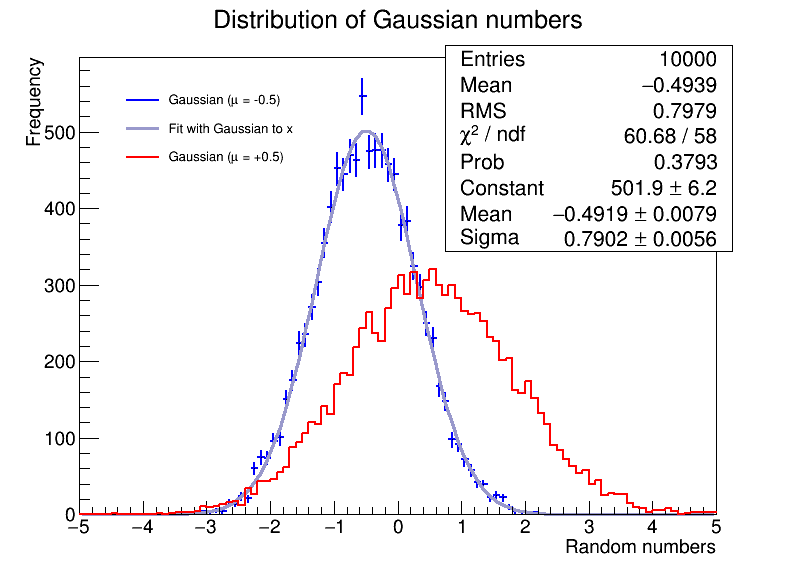

In [3]:
canvas

In [4]:
#----------------------------------------------------------------------------------
# Graph with fit (1D):
#----------------------------------------------------------------------------------

# Statistics and fitting results replaced in:
rt.gStyle.SetStatX(0.52);    # Top left corner.
rt.gStyle.SetStatY(0.86);

# Define a graph with errors: (name, title, number of bins, minimum, maximum):
# Graphs in ROOT requires arrays, which is why these were included at the top!
Ndata = 20
x  = array( 'f', [0.0]*Ndata ) 
y  = array( 'f', [0.0]*Ndata )
ex = array( 'f', [0.0]*Ndata )
ey = array( 'f', [0.0]*Ndata )

# Having defined four arrays filled with zeros, below we fill it with values:
for i in range ( Ndata ) :
    x[i] = 0.4 + 0.1*i
    y[i] = (x[i]-1.0)*(x[i]-1.0) - 2.0 + r.Gaus(0.0, 0.2)    # Adding a Gaussian error of 0.2
    ex[i] = 0.0                                              # Not really needed
    ey[i] = 0.2                                              # Writing down the error

# Define the graph:
Graph_x = rt.TGraphErrors(Ndata, x, y, ex, ey)

# Plot graph:
# -----------
canvas2 = plotting.canvas(name='grop')
#rt.TCanvas( "canvas2", "canvas2", 100, 100, 1200, 600 )

Graph_x.SetTitle("Fit of a graph")
Graph_x.GetXaxis().SetRangeUser(-5.0, 5.0)
Graph_x.GetXaxis().SetTitle("Deciliters of alcohol")
Graph_x.GetYaxis().SetTitle("Spirit")
Graph_x.SetMarkerStyle(20)
Graph_x.SetLineColor(rt.kBlue)
Graph_x.SetLineWidth(1)
Graph_x.Draw("AP")                     # The option "e" shows (Poisson!) errors

# Fit graph:
# ----------
# There are three ways of fitting!
#   1: Predefined function (ROOT has gaus, expo, polX, etc.)
#   2: Writing function explicitly (for simple functions)
#   3: Defining external function (for advanced functions)

# Predefined function:
fit_x1 = rt.TF1("fit_x1", "pol2", 0.3, 2.4)
fit_x1.SetLineColor(rt.kRed)
Graph_x.Fit("fit_x1")

# Writing function explicitely:
fit_x2 = rt.TF1("fit_x2", "[0] + [1]*x + [2]*x*sqrt(x)", 0.3, 2.4)
fit_x2.SetParameters(-1.0, -1.0, 1.0)           # Remember to give good starting values!
fit_x2.SetLineColor(rt.kRed-3)
Graph_x.Fit("fit_x2","+")                       # Option "+" adds fit (not deleting old one!).

# Defining external function:
def func_advanced (x, p) :
    if (x[0] < 1.25) :
        return p[0] + p[1]*x[0] + p[2]*x[0]*x[0]
    else :
        return p[0] + p[1]*x[0] + 0.9*x[0]*x[0]

fit_x3 = rt.TF1("fit_x3", func_advanced, 0.3, 2.4, 3)   # Here you need to define number of variables
fit_x3.SetParameters(-1.0, -1.0, 1.0)           # Remember to give good starting values!
fit_x3.SetLineColor(rt.kRed+3) 
Graph_x.Fit("fit_x3", "+")

canvas2.Update()
if (SavePlots):
    canvas2.SaveAs("Graph.png")

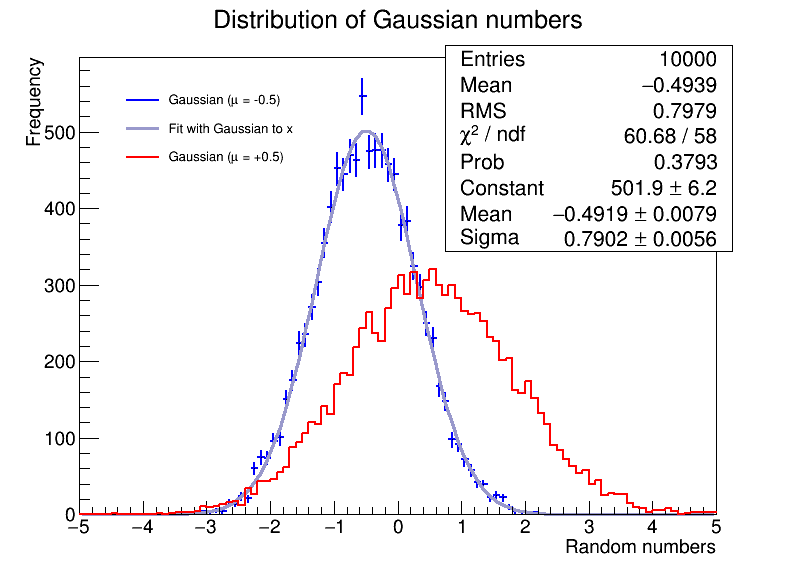

In [5]:
canvas

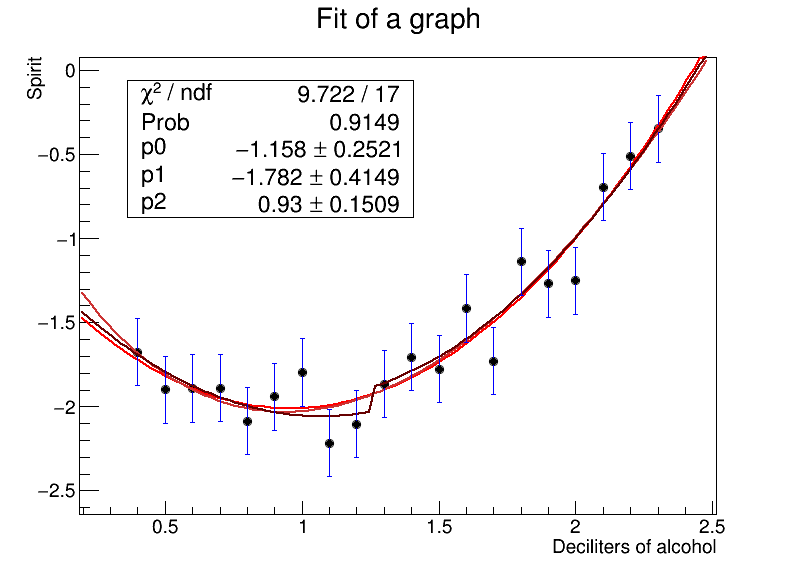

In [6]:
canvas2

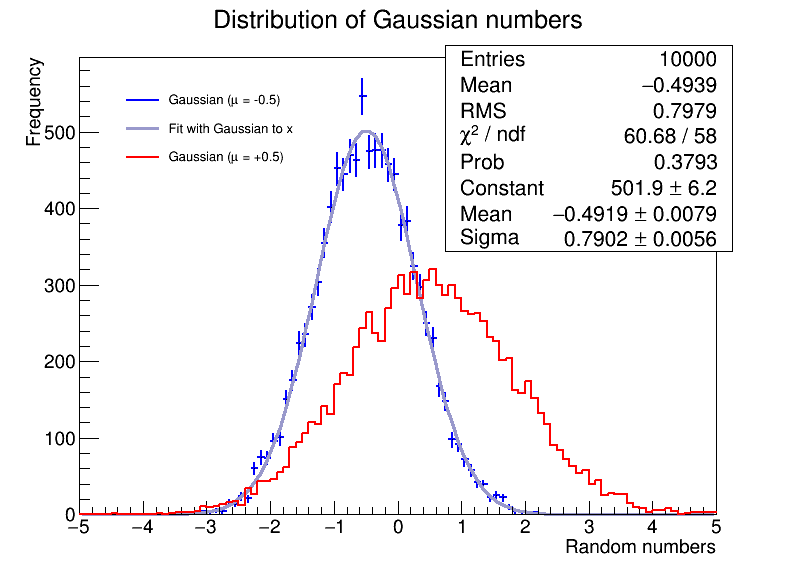

In [7]:
canvas